# Analysis of facebook dataset downloaded from Thinknum
* The dataset provides the information about customer traction/foot traffic/brand awareness of companie in 2015-2016

**Data ingestion and cleanning**

In [3]:
!pwd
!ls

/e/New_Career/Data_Incubator/Challenge_072019
BPD_Part_1_Victim_Based_Crime_Data.csv
Challenge_The Data Incubator_072019.pdf
FB_DS_TDI.ipynb
Parking_Citations.csv
facebook.csv
knight.py
temp_datalab_records_social_facebook


In [7]:
import pandas as pd
fb = pd.read_csv('facebook.csv', sep=',', low_memory=False)
fb.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_added,date_updated,entity_id,cusip,isin
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,NaN,2017-02-14 03:35:13.236826+00,NaN,NaN,NaN
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,NaN,2017-02-14 01:55:52.78506+00,NaN,NaN,NaN
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,NaN,2017-02-14 08:13:51.267343+00,NaN,NaN,NaN
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,NaN,2017-02-14 03:24:04.363035+00,NaN,NaN,NaN
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,NaN,2017-02-14 02:22:10.193588+00,NaN,NaN,NaN


In [15]:
del fb['date_added']
del fb['entity_id']
del fb['cusip']
del fb['isin']
fb.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_updated
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,2017-02-14 03:35:13.236826+00
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,2017-02-14 01:55:52.78506+00
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,2017-02-14 08:13:51.267343+00
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,2017-02-14 03:24:04.363035+00
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,2017-02-14 02:22:10.193588+00


In [16]:
fb_clean = fb.dropna(axis=0)
fb_clean.head()

,dataset_id,time,username,checkins,has_added_app,were_here_count,likes,talking_about_count,facebook_id,date_updated
0,53088,2015-01-01 05:00:00+00,SodaStream,0,f,0,761533,587,54885616308,2017-02-14 03:35:13.236826+00
1,52642,2015-01-01 05:00:00+00,ANSYSInc,148,f,0,43442,1305,160242297413411,2017-02-14 01:55:52.78506+00
2,53656,2015-01-01 05:00:00+00,MyAquaAmerica,0,f,0,5591,297,591693544195818,2017-02-14 08:13:51.267343+00
3,53033,2015-01-01 05:00:00+00,Qualcomm,173,f,0,1232521,2685,108472637291,2017-02-14 03:24:04.363035+00
4,52783,2015-01-01 05:00:00+00,eaglepharmaceuticals,0,f,0,18,0,1428265940729350,2017-02-14 02:22:10.193588+00


**Statistics and Data visualization**

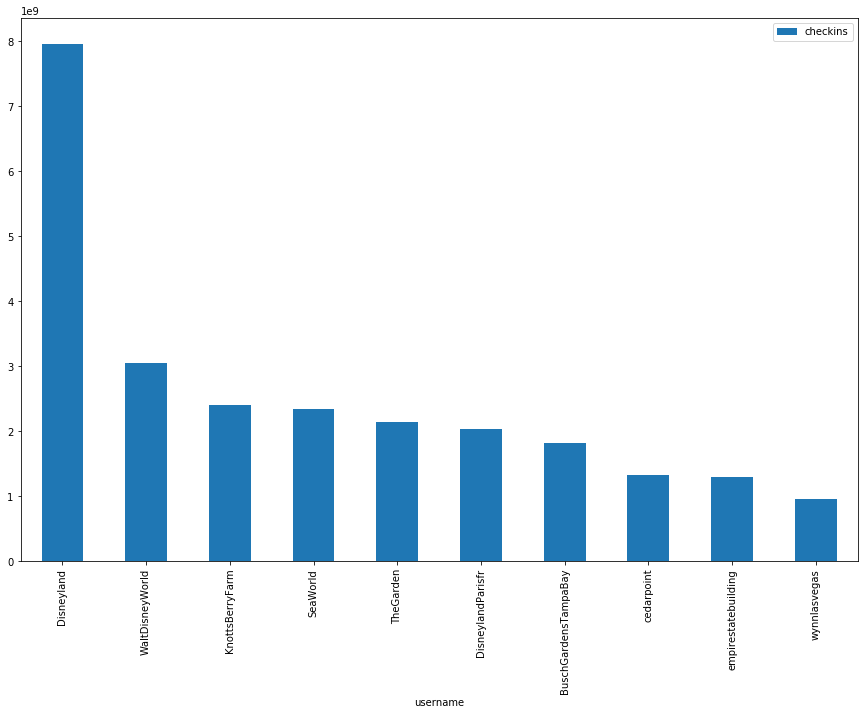

In [26]:
%matplotlib inline
checkin = fb_clean[['username','checkins']].groupby('username').sum()
checkin.sort_values(by='checkins', ascending=False)[:10].plot(kind='bar', figsize=(15,10))

* It is found that the checkins in Disneyland is much higher than the other places

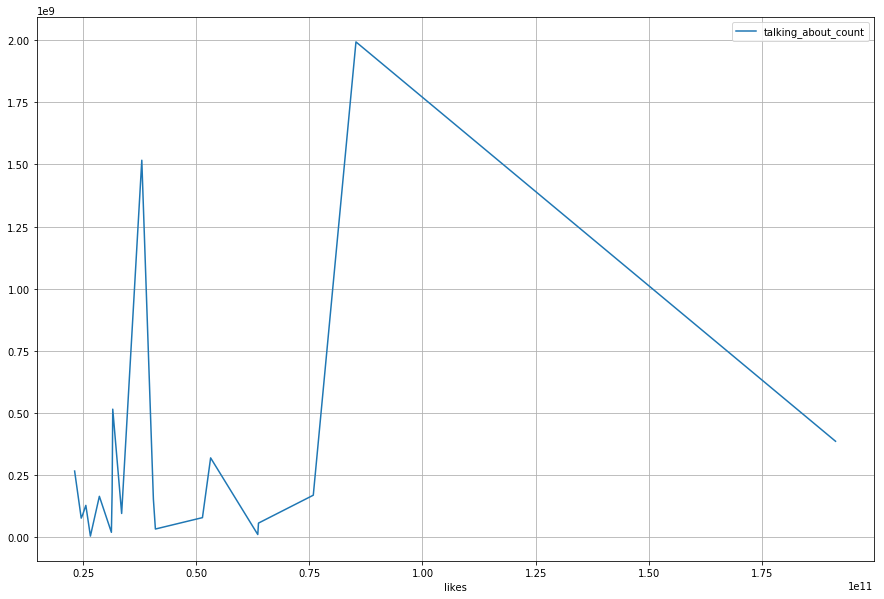

In [32]:
likes = fb_clean[['username','likes','talking_about_count']].groupby('username',as_index=False).sum()
likes[['likes','talking_about_count']].sort_values(by='likes')[-20:].plot(x='likes', y='talking_about_count', figsize=(15,10), grid=True)

* There is not a clear trend between likes and talk_about_count, even with more likes it doesn't necessary mean that more people are talking about the company. It could be the opposite way, for example, people may talk about the company at high counts because they hate it. So the number of likes cannot be a standard of how often people talk about the company and cannot be a decisive marketing strategy for the company.

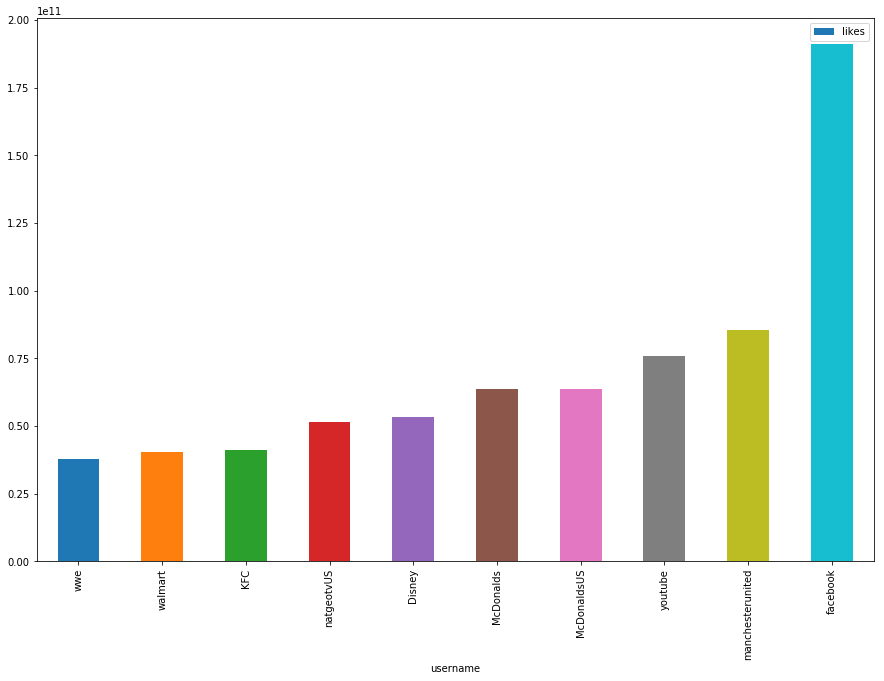

In [33]:
likes[['username','likes']].sort_values(by='likes')[-10:].plot(kind='bar', x='username', y='likes',figsize=(15,10))

* Except for facebook, the one publish the dataset and surpass others by a huge number of likes, the rest companies don't lie into specific category of industry. So it is hard to predict which category is more popular without further analysis such as machine learning modeling on the category of industry in different years.
* Other similar analysis including in a single year visualize checkins versus month of year/time of day/day of a week etc. to have an idea about what time people tend to visit a specific company to help the company make marketing or recruiting strategy.
* If another related table about the information of the company could be obtained, one could also analyze the relationship between likes/checkins and the revenue/number of sites of the company, and the site location may also related to the population of that site etc. 